In [34]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1

In [35]:
def coeff(xn, yn):
    # define a new function called coeff()
    # the function will compute the coefficients c0, c1,...,cn
    # xn is the nodes
    # yn is the value corresponding to the xn
    cn = np.copy(yn) # return an array copy of yn
    n = len(xn) - 1 # set n to the length of xn subtract by 1
    for k in range(1,n+1): # implement a for loop with an indicator variable of k within a range
        for j in range(n,k-1,-1): # implement a nested for loop with an indicator variable of j within a range
            cn[j] = (cn[j]-cn[j-1])/(xn[j]-xn[j-k])
    return cn
    # returns the coefficients

def interpolation(x, xn, cn):
    
    # define a new function called interpolation
    # the function will compute the newton interpolation polynomial at an arbitrary point x
    # x is an arbitrary point
    # xn is the nodes
    # cn is the newtons form coefficient
    n = len(cn)-1 # set n to be the value after the length of cn subtract by 1
    i_p = cn[n] # n is the number to corresponding cn
    for j in range(n-1,-1,-1): # implement a for loop with j as indicator variable within a range
        i_p = cn[j]+(x-xn[j])*i_p
    return i_p
    # the functions returns the estimated value at x

Test Code

Coefficients for f(x)=2x from Newton's Interpolation:  [-2.  2.  0.  0.  0.]


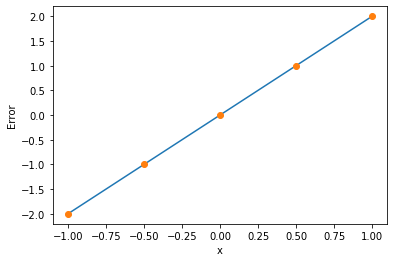

In [36]:
# let xn be an array
xn = np.array([-1,-1/2,0,1/2,1]) 
# yn is the value of 2 times xn, whih is the corresponding value to xn
yn = 2*xn
# utilize the use defined function coeff() and set the value to cn
cn = coeff(xn, yn)       
# print the resulting value of n
print("Coefficients for f(x)=2x from Newton's Interpolation: ", cn)

# define a variable xbar
# that will return even-spaced values within the indicated interval
x_bar = -1+np.arange(101)*2/100  
    
# the value at test points
p_s = np.zeros_like(x_bar) # use np.zeros_like to return an array of zeros that has the same type as xbar
for i, x in enumerate(x_bar): # implement a for loop with indiator variable i and x
    p_s[i] = interpolation(x,xn,cn) # utilize the user defined function

# contruct a plot for the curve of error
plt.figure()
plt.plot(x_bar,p_s)
plt.plot(xn,yn,'o')
# labeling the x axis
plt.xlabel('x')
# labeling the y axis
plt.ylabel('Error')

# display the constructed plot
plt.show()

The implementation is good.

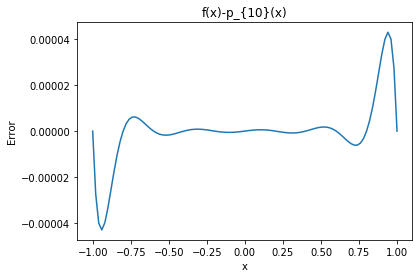

In [37]:
# nodes represented as array
# that will return even-spaced values within the indicated interval
xn = -1+np.arange(11)*2/10  
# values corresponding to the nodes xn 
# that will calulate the exponential of items in the array xn
yn = xn*np.exp(-xn**2) 
# utilize the user defined funtion and set to cn
cn = coeff(xn, yn)   

# define a variable xbar
# that will return even-spaced values within the indicated interval
x_bar = -1+np.arange(101)*2/100  
    
# the value at test points
p_s = np.zeros_like(x_bar) # use np.zeros_like to return an array of zeros that has the same type as xbar
for i, x in enumerate(x_bar): # implement a for loop with indiator variable i and x
    p_s[i] = interpolation(x,xn,cn) # utilize the user defined function

# contruct a plot for the curve of error
plt.figure()
plt.plot(xbar,xbar*np.exp(-xbar**2)-ps)
# labeling the x axis
plt.xlabel('x')
# labeling the y axis
plt.ylabel('Error')
# create a title for the constructed plot
plt.title('f(x)-p_{10}(x)')

# display the constructed plot
plt.show()

# Problem 4



In [38]:

def nscoeff(xn, yn):
    # define a new function called nscoeff()
    # the function will compute the coefficients for the natural spline interpolation polynomail
    # the function will take in xn value, which is the nodes
    # the function will take in yn value, which is the values corresponding to xn
    
    dxn = np.diff(xn)  # use np.diff to take in xn to find differences of nodes
    dyn = np.diff(yn)  # use np.diff to take in yn to determine the differences of values
    
    dn = np.zeros(len(xn))  # use np.zeros to return an array filled with zeros. find derivatives
    dn[1:-1] = tridiagonal((dxn[1:-1], 2*(dxn[:-1]+dxn[1:]), dxn[1:-1]),
                        np.diff(6*dyn/dxn)) # utilize the user defined function

    cn = np.empty((len(xn), 4)) # use np.empty to return an array without intializing entries
    cn[:-1,0] = np.diff(dn)/(6*dxn)
    cn[-1,0] = np.nan # not a number
    cn[:,1] = dn/2
    cn[:-1,2] = dyn/dxn-dxn*(dn[1:]+2*dn[:-1])/6
    cn[-1,2] = np.nan # not a number
    cn[:,3] = yn
    
    return cn
    # the function will return the coefficients

# function to get the evaluation of the natural spline S(x)
def nsplinterpolation(x, xn, cn):
    # define a new function called nsplinterpolation
    # the function will compute the natural splines interpolation polynomial at an arbitrary x
    # the function will take in x, which is an arbitrary point
    # the function will take in xn, which is the nodes
    # the function will take in cn, which is the natural splines coefficients
   
    i = np.searchsorted(xn,x,'left') # maintain order
    if i > 0: # set conditions
        d = x-xn[i-1]
        i_p = ((cn[i-1,0]*d+cn[i-1,1])*d+cn[i-1,2])*d+cn[i-1,3]
    else:
        i_p = cn[0,3] # values 0 to 3
    return i_p

# tridiagonal solver
def tridiagonal(diagonal, bv):
    # define a new function call tridiagonal()
    # that solves for linear equation
    # takes in diagonal, which is a list contains diagonal values
    # takes in bv, which is a vector value
    
    dd, dm, du = np.array(diagonal[0]), np.array(diagonal[1]), np.array(diagonal[2])
    
    # solve this tridiagonal linear equation
    for i in range(len(bv)-1): # implement for loop with indicator variable i within a range
        dd[i] = dd[i]/dm[i]
        dm[i+1] = dm[i+1]-dd[i]*du[i]
    x = np.copy(bv)
    for i in range(1,len(bv)): # implement for loop with indicator variable i within a range
        x[i] = x[i]-dd[i-1]*x[i-1]
    x[len(bv)-1] = x[len(bv)-1]/dm[len(bv)-1]
    for i in range(len(bv)-2,-1,-1): # implement for loop with indicator variable i within a range
        x[i] = (x[i]-du[i]*x[i+1])/dm[i]
    
    return x

# Problem 5



     $t$   $x$   $y$     $a_x$     $b_x$     $c_x$  $d_x$     $a_y$     $b_y$  \
0  0.000  1.50  0.75  0.010537  0.000000 -0.974898   1.50  0.276944  0.000000   
1  0.618  0.90  0.90  0.102103  0.019535 -0.962825   0.90 -3.001012  0.513454   
2  0.935  0.60  1.00  0.987167  0.116635 -0.919659   0.60  2.430450 -2.340509   
3  1.255  0.35  0.80 -1.773549  1.064316 -0.541755   0.35 -0.273187 -0.007277   
4  1.636  0.20  0.45  5.394568 -0.962851 -0.503097   0.20  2.173896 -0.319530   
5  1.905  0.10  0.20 -3.393333  3.390566  0.149959   0.10 -0.784397  1.434804   
6  2.317  0.50  0.10  0.670643 -0.803594  1.215791   0.50 -0.474226  0.465289   
7  2.827  1.00  0.20 -0.147442  0.222490  0.919428   1.00  0.172483 -0.260277   
8  3.330  1.50  0.25       NaN  0.000000       NaN   1.50       NaN  0.000000   

      $c_y$  $d_y$  
0  0.136947   0.75  
1  0.454261   0.90  
2 -0.124915   1.00  
3 -0.876207   0.80  
4 -1.000720   0.45  
5 -0.700711   0.20  
6  0.082127   0.10  
7  0.186683   0.20  


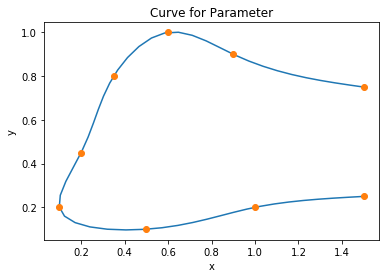

In [39]:
# load the given data as an array
data = np.array([
[0, 1.5, 0.75],[0.618, 0.90, 0.90],[0.935, 0.60, 1.00],[1.255, 0.35, 0.80],
[1.636, 0.20, 0.45],[1.905, 0.10, 0.20],[2.317, 0.50, 0.10],[2.827, 1.00, 0.20],
[3.330, 1.50, 0.25]
])

# compute coefficients of S_x(t)
c_n_x = nscoeff(data[:,0], data[:,1])

# compute coefficients of S_y(t)
c_n_y = nscoeff(data[:,0], data[:,2])

# tabulate
print(pd.DataFrame(np.hstack((data,cn_x,cn_y)),
       columns=['$t$','$x$','$y$','$a_x$','$b_x$','$c_x$',
                '$d_x$','$a_y$','$b_y$','$c_y$','$d_y$']))

# plot the parametric curve
t_bar = np.linspace(data[0,0],data[-1,0]) # use linespace to return an even spaced number within interval
p_sx = np.zeros_like(t_bar) # use np.zeros_like to return an array of zeros that has the same type as t_bar
p_sy = np.zeros_like(t_bar) # use np.zeros_like to return an array of zeros that has the same type as t_bar
for i, t in enumerate(t_bar): # implement for loop with indicator i and t
    p_sx[i] = nsplinterpolation(t,data[:,0],c_n_x) # utilize user defined function
    p_sy[i] = nsplinterpolation(t,data[:,0],c_n_y) # utilize user defined function

# create a plot
plt.figure()
plt.plot(p_sx,p_sy)
plt.plot(data[:,1],data[:,2],'o')
# labeling the x axis
plt.xlabel('x')
# labeling the y axis
plt.ylabel('y')
# create a title for the plot
plt.title('Curve for Parameter')

# display the contructed plot
plt.show()